Neural network to classify hand-written digits as 0 or 1

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

1000 training examples of the digits 0 and 1  
each image resized from 20x20 grid to 400 dimensional vector

In [2]:
def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

X, y = load_data()

In [3]:
# print('The first element of X is: ', X[0])
# print('The first element of y is: ', y[0, 0])
# print('The last element of y is: ', y[-1, 0])

print('The shape of X is: ', str(X.shape))
print('The shape of y is: ', str(y.shape))

The shape of X is:  (1000, 400)
The shape of y is:  (1000, 1)


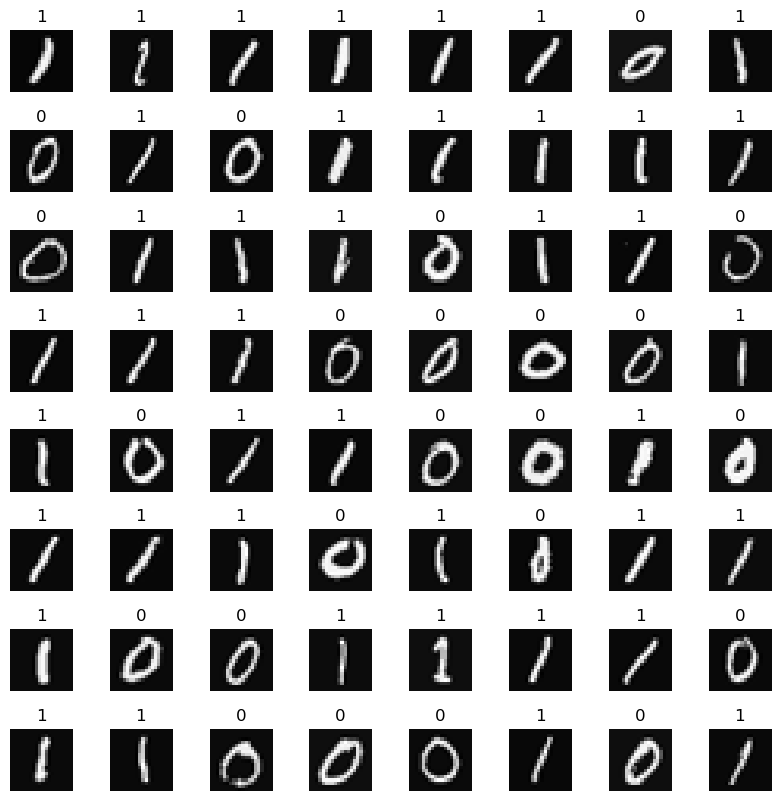

In [4]:
# visualizing the data (a random subset of it)
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8,8))  # 8x8 grid i.e. 64 total images
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # select random indices
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

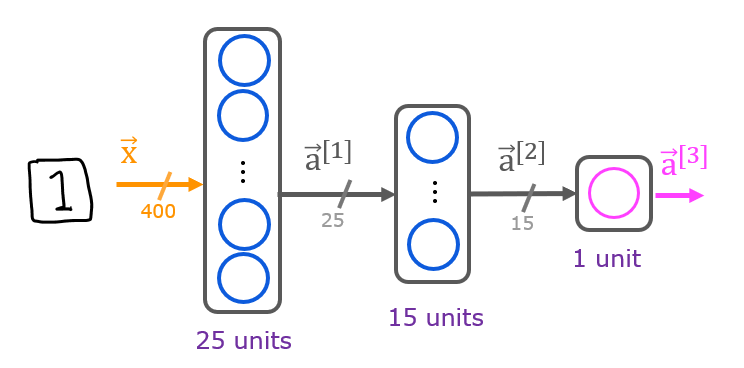

- If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then   
            - $W$ will be of dimension $s_{in} \times s_{out}$.  
            - $b$ will a vector with $s_{out}$ elements

In [5]:
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(400, 25)
        self.layer2 = nn.Linear(25, 15)
        self.layer3 = nn.Linear(15, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

In [6]:
model = Model()

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [7]:
W1 = model.layer1.weight.data
b1 = model.layer1.bias.data
W2 = model.layer2.weight.data
b2 = model.layer2.bias.data
W3 = model.layer3.weight.data
b3 = model.layer3.bias.data

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = torch.Size([25, 400]), b1 shape = torch.Size([25])
W2 shape = torch.Size([15, 25]), b2 shape = torch.Size([15])
W3 shape = torch.Size([1, 15]), b3 shape = torch.Size([1])


In [12]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()

    optimizer.zero_grad()
    outputs = model(X)

    loss = criterion(outputs, y)
    loss.backward()

    optimizer.step()
    print(f'Epoch [{epoch+1}/20], Loss: {loss.item()}')


Epoch [1/20], Loss: 0.5266449451446533
Epoch [2/20], Loss: 0.5228345394134521
Epoch [3/20], Loss: 0.5190149545669556
Epoch [4/20], Loss: 0.5151873230934143
Epoch [5/20], Loss: 0.5113527774810791
Epoch [6/20], Loss: 0.5075123310089111
Epoch [7/20], Loss: 0.5036673545837402
Epoch [8/20], Loss: 0.49981889128685
Epoch [9/20], Loss: 0.49596792459487915
Epoch [10/20], Loss: 0.49211546778678894
Epoch [11/20], Loss: 0.48826268315315247
Epoch [12/20], Loss: 0.48441046476364136
Epoch [13/20], Loss: 0.4805598258972168
Epoch [14/20], Loss: 0.4767116606235504
Epoch [15/20], Loss: 0.47286704182624817
Epoch [16/20], Loss: 0.46902674436569214
Epoch [17/20], Loss: 0.4651917815208435
Epoch [18/20], Loss: 0.4613630473613739
Epoch [19/20], Loss: 0.45754143595695496
Epoch [20/20], Loss: 0.4537278413772583
Epoch [21/20], Loss: 0.44992321729660034
Epoch [22/20], Loss: 0.446128249168396
Epoch [23/20], Loss: 0.44234395027160645
Epoch [24/20], Loss: 0.43857115507125854
Epoch [25/20], Loss: 0.43481066823005676
E

In [9]:
with torch.no_grad():
    model.eval()
    input_data = torch.tensor(X[0].reshape(1, 400), dtype=torch.float32)
    prediction = model(input_data)
    print(f" predicting a zero: {prediction}")
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    print(f"prediction after threshold: {yhat}")

    input_data = torch.tensor(X[500].reshape(1, 400), dtype=torch.float32)
    prediction = model(input_data)
    print(f" predicting a zero: {prediction}")
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    print(f"prediction after threshold: {yhat}")
    

 predicting a zero: tensor([[0.4846]])
prediction after threshold: 0
 predicting a zero: tensor([[0.5182]])
prediction after threshold: 1


C:\Users\avira\AppData\Local\Temp\ipykernel_5936\2590389424.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(X[0].reshape(1, 400), dtype=torch.float32)
C:\Users\avira\AppData\Local\Temp\ipykernel_5936\2590389424.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(X[500].reshape(1, 400), dtype=torch.float32)


C:\Users\avira\AppData\Local\Temp\ipykernel_5936\2601725473.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(X[random_index].reshape(1, 400), dtype=torch.float32)


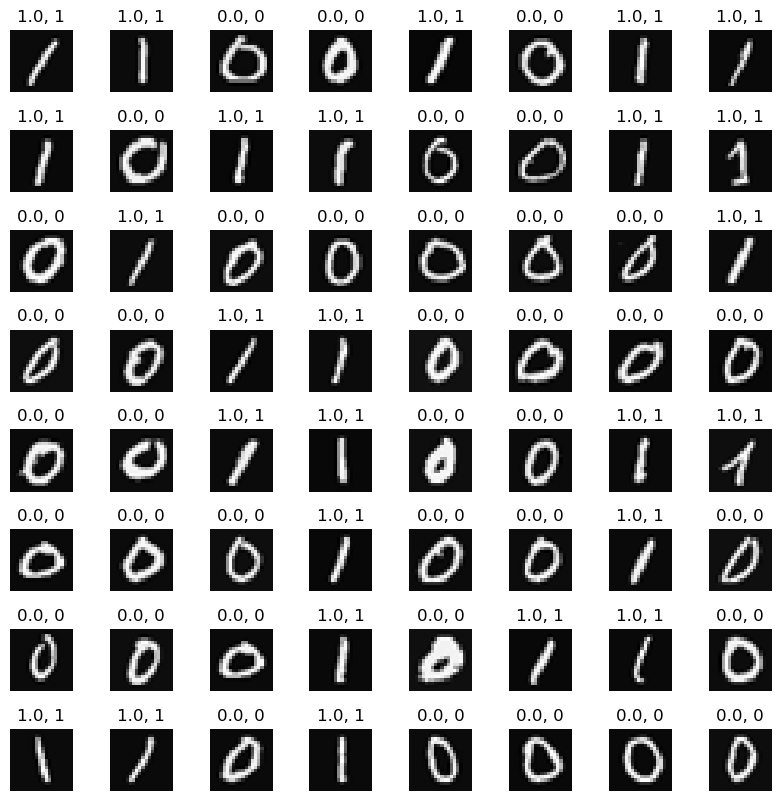

In [10]:
# comparing with dataset

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8,8))  # 8x8 grid i.e. 64 total images
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # select random indices
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    with torch.no_grad():
        model.eval()
        input_data = torch.tensor(X[random_index].reshape(1, 400), dtype=torch.float32)
        prediction = model(input_data)
        if prediction.data >= 0.5:
            yhat = 1
        else:
            yhat = 0

    ax.set_title(f'{y[random_index, 0]}, {yhat}')
    ax.set_axis_off()